In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dl-2024/dadosTextosCientificos.tsv


In [24]:
df = pd.read_csv('../input/dl-2024/dadosTextosCientificos.tsv',
                   sep='\t',
                   engine='python',
                   encoding='latin-1')

In [25]:
df

,Título_Público,Descricao_pública
0,Açúcar de frutas e aplicação em bolos como sub...,O uso de inovações tecnológicas auxilia as ind...
1,Desenvolver uma linha de farofas com castanhas...,O uso de inovações tecnológicas auxilia as ind...
2,Desenvolvimento de cobertura líquida para sorvete,O Brasil é considerado um país com a maior bio...
3,Desenvolvimento de conserva de tomate cereja,O Brasil é considerado o país com maior biodiv...
4,Desenvolvimento de massa alimentícia enriqueci...,Nos últimos anos a comunidade científica tem d...
...,...,...
2720,Desenvolvimento de ativos biotecnológicos para...,O avanço das tecnologias para estudos genômico...
2721,SIMA MV POWER,Projeto de PD&I para desenvolvimento de um sis...
2722,Talhonameno Ótimo Klabin,"A Klabin S/A é uma empresa brasileira, de cará..."
2723,Tecnologia de Quantificação de Estoque de Carb...,Com a execução do presente projeto espera-se d...


In [26]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import spacy

In [27]:
!python -m spacy download pt_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 2.8 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


In [28]:

def preprocess_text(text):
    if pd.isnull(text):
        return ""
    doc = nlp(text)
    lemmatized = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(lemmatized)

# Carregar a base de dados
df = pd.read_csv('/kaggle/input/dl-2024/dadosTextosCientificos.tsv', sep='\t', encoding='latin1')

df['texto_completo'] = df['Título_Público'] + " " + df['Descricao_pública']

df['texto_completo'].fillna("", inplace=True)

df['texto_preprocessado'] = df['texto_completo'].apply(preprocess_text)

vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # n-grama de 1 e 2 palavras
X = vectorizer.fit_transform(df['texto_preprocessado'])

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

score = silhouette_score(X, df['cluster'])
print(f'Silhouette Score: {score}')

for i in range(num_clusters):
    print(f"\nCluster {i}:")
    print(df[df['cluster'] == i]['Título_Público'])

def get_top_keywords(cluster_centers, terms, num_terms=10):
    top_keywords = []
    for i, center in enumerate(cluster_centers):
        term_ranking = center.argsort()[-num_terms:][::-1]
        keywords = [terms[idx] for idx in term_ranking]
        top_keywords.append(keywords)
    return top_keywords

terms = vectorizer.get_feature_names_out()
top_keywords = get_top_keywords(kmeans.cluster_centers_, terms)

for i, keywords in enumerate(top_keywords):
    print(f"\nPrincipais palavras no Cluster {i}:")
    print(", ".join(keywords))

/tmp/ipykernel_30/1343194774.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['texto_completo'].fillna("", inplace=True)
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.001532117001245449

Cluster 0:
22      HUAWEI - PV generation with optimal BESS based...
23               HUAWEI SOLAR TRACKING CONTROL (AI BASED)
30                                           ACELERA VTEX
35                                          AGORA DIGITAL
36                                                  AIPIM
                              ...                        
2682    Desenvolvimento de um sistema de visão computa...
2701    Otimização com espectroscopia no monitoramento...
2711    Sistema de navegação e inspeção autônoma de pá...
2712    Sistema inteligente de classificação de planta...
2713    Sistema para classificação estatística de grão...
Name: Título_Público, Length: 254, dtype: object

Cluster 1:
0       Açúcar de frutas e aplicação em bolos como sub...
1       Desenvolver uma linha de farofas com castanhas...
2       Desenvolvimento de cobertura líquida para sorvete
3            Desenvolvimento de conserva de tomate cereja
4       Desenvolvi

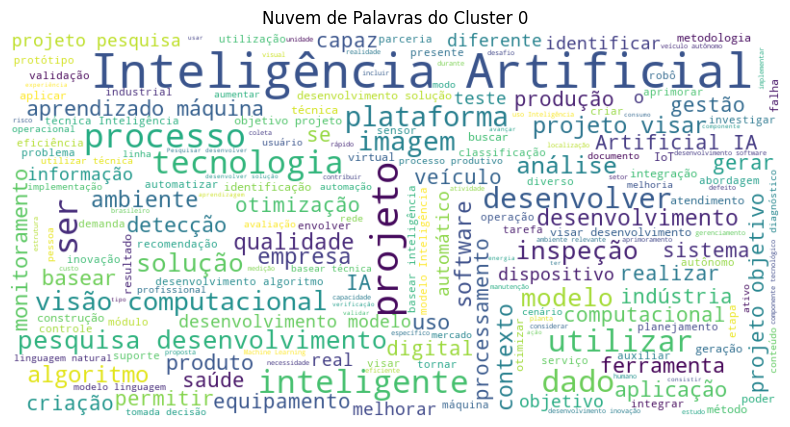

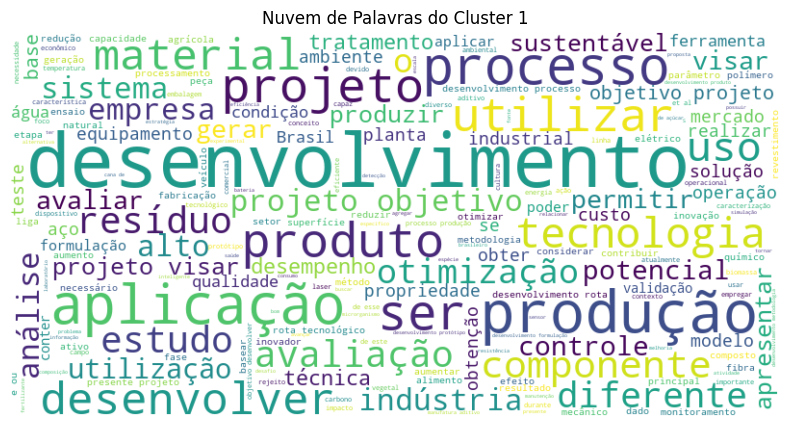

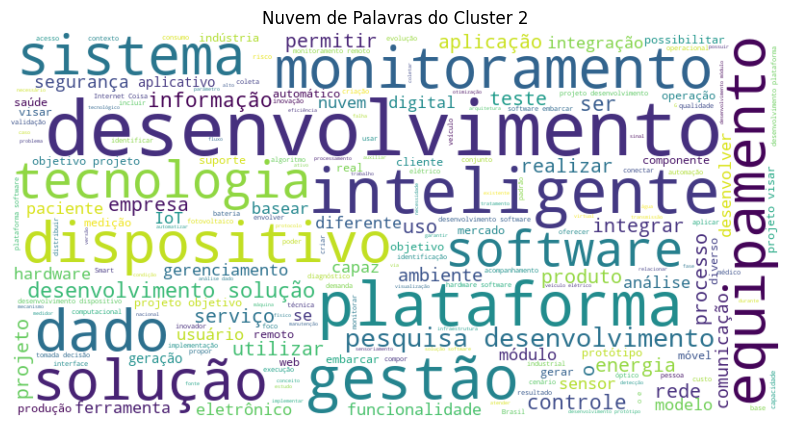

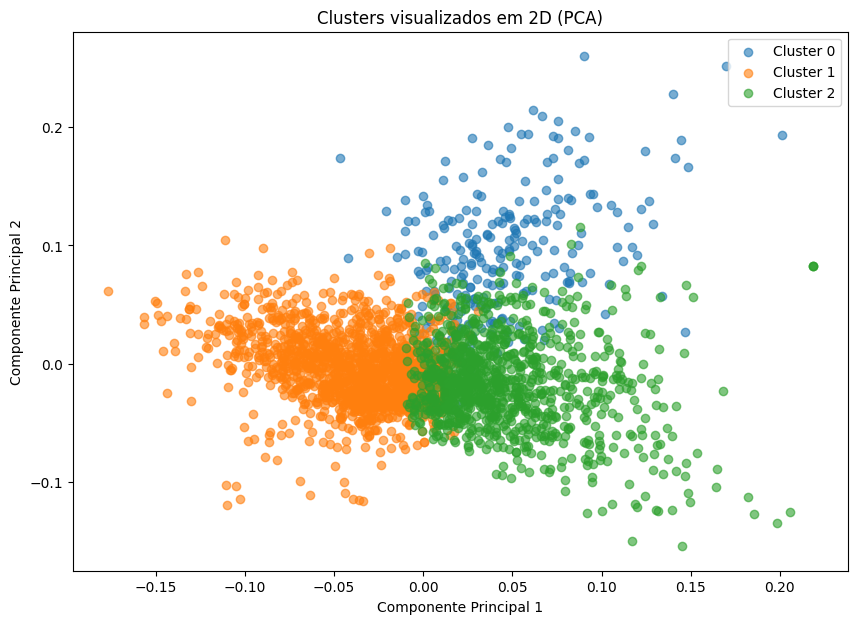

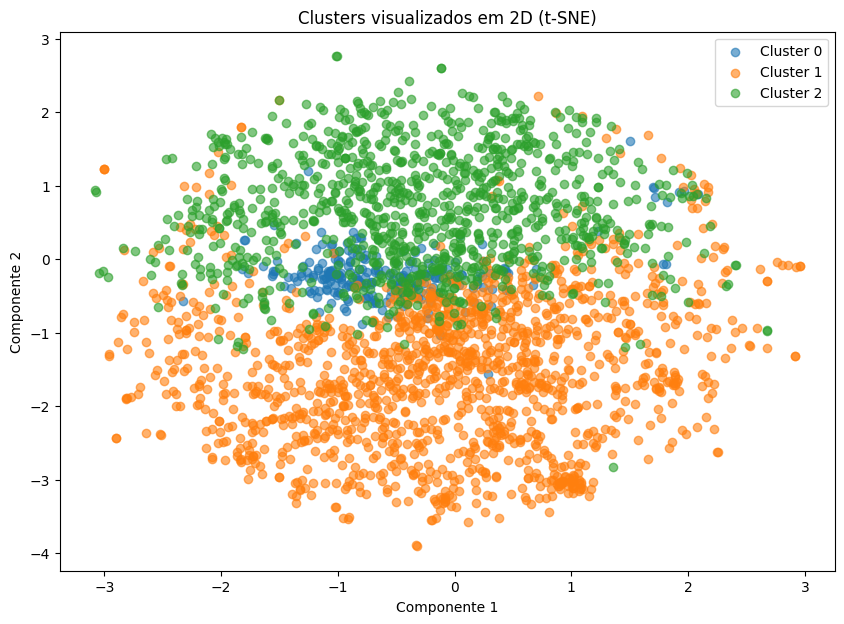

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Gerar nuvens de palavras para cada cluster
for i in range(num_clusters):
    cluster_text = " ".join(df[df['cluster'] == i]['texto_preprocessado'])
    
    create_wordcloud(cluster_text, f'Nuvem de Palavras do Cluster {i}')

def plot_pca_clusters(X, labels):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X.toarray())
    
    plt.figure(figsize=(10, 7))
    
    # Plotar cada cluster com uma cor diferente
    for cluster in range(num_clusters):
        plt.scatter(X_pca[labels == cluster, 0], X_pca[labels == cluster, 1], 
                    label=f'Cluster {cluster}', alpha=0.6)
    
    plt.title('Clusters visualizados em 2D (PCA)')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend()
    plt.show()


plot_pca_clusters(X, df['cluster'])


def plot_tsne_clusters(X, labels):
    tsne = TSNE(n_components=2, perplexity=40, random_state=42)
    X_tsne = tsne.fit_transform(X.toarray())
    
    plt.figure(figsize=(10, 7))
    
    # Plotar cada cluster com uma cor diferente
    for cluster in range(num_clusters):
        plt.scatter(X_tsne[labels == cluster, 0], X_tsne[labels == cluster, 1], 
                    label=f'Cluster {cluster}', alpha=0.6)
    
    plt.title('Clusters visualizados em 2D (t-SNE)')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.legend()
    plt.show()

plot_tsne_clusters(X, df['cluster'])


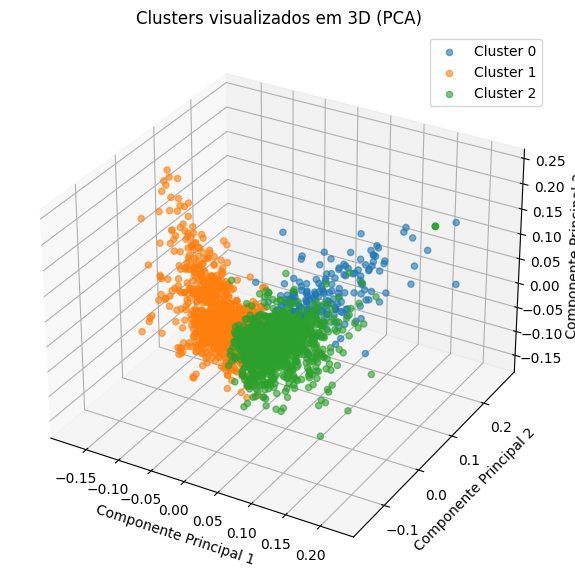

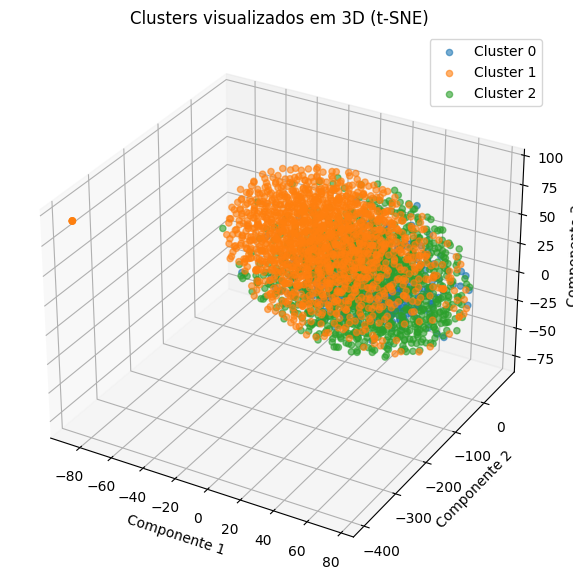

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Função para plotar clusters em 3D usando PCA
def plot_pca_clusters_3d(X, labels):
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X.toarray())
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plotar cada cluster com uma cor diferente
    for cluster in range(num_clusters):
        ax.scatter(X_pca[labels == cluster, 0], 
                   X_pca[labels == cluster, 1], 
                   X_pca[labels == cluster, 2], 
                   label=f'Cluster {cluster}', alpha=0.6)
    
    ax.set_title('Clusters visualizados em 3D (PCA)')
    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_zlabel('Componente Principal 3')
    plt.legend()
    plt.show()

# Função para plotar clusters em 3D usando TSNE
def plot_tsne_clusters_3d(X, labels):
    tsne = TSNE(n_components=3, perplexity=40, random_state=42)
    X_tsne = tsne.fit_transform(X.toarray())
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plotar cada cluster com uma cor diferente
    for cluster in range(num_clusters):
        ax.scatter(X_tsne[labels == cluster, 0], 
                   X_tsne[labels == cluster, 1], 
                   X_tsne[labels == cluster, 2], 
                   label=f'Cluster {cluster}', alpha=0.6)
    
    ax.set_title('Clusters visualizados em 3D (t-SNE)')
    ax.set_xlabel('Componente 1')
    ax.set_ylabel('Componente 2')
    ax.set_zlabel('Componente 3')
    plt.legend()
    plt.show()

# Plotar os clusters em 3D usando PCA
plot_pca_clusters_3d(X, df['cluster'])

# Plotar os clusters em 3D usando t-SNE (opcional)
plot_tsne_clusters_3d(X, df['cluster'])
